# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Abdul Syukur Kamaruddin
- **Email:** abdulsyukursyam@gmail.com
- **ID Dicoding:** abdlsykr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dari waktu ke waktu?
- Siapa pelanggan paling bernilai berdasarkan RFM Analysis?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
url_orders = "https://raw.githubusercontent.com/abdlsykr/portfolio/refs/heads/main/Dicoding/Belajar_Analisis_Data_dengan_Python/Ecommerce_Public_Dataset/data/orders_dataset.csv"
url_order_items = "https://raw.githubusercontent.com/abdlsykr/portfolio/refs/heads/main/Dicoding/Belajar_Analisis_Data_dengan_Python/Ecommerce_Public_Dataset/data/order_items_dataset.csv"
url_customers = "https://raw.githubusercontent.com/abdlsykr/portfolio/refs/heads/main/Dicoding/Belajar_Analisis_Data_dengan_Python/Ecommerce_Public_Dataset/data/customers_dataset.csv"

orders_df = pd.read_csv(url_orders)
order_items_df = pd.read_csv(url_order_items)
customers_df = pd.read_csv(url_customers)

**Insight:**
- Dataset yang digunakan mencakup informasi pesanan, detail transaksi, dan data pelanggan, memungkinkan analisis mendalam tentang tren penjualan dan perilaku pelanggan.
- Ditemukan kemungkinan duplikasi dan nilai kosong yang harus dibersihkan sebelum analisis untuk memastikan data akurat dan dapat digunakan dengan baik.

### Assessing Data

In [4]:
print("Orders Dataset:")
print(orders_df.info())
print("\nOrder Items Dataset:")
print(order_items_df.info())
print("\nCustomers Dataset:")
print(customers_df.info())

Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   or

**Insight:**
- Pada dataset Orders, kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki jumlah nilai non-null yang lebih sedikit dibandingkan total entri, yang berarti terdapat data yang hilang di dalamnya.
- Beberapa kolom seperti order_purchase_timestamp, order_approved_at, dan shipping_limit_date seharusnya bertipe datetime tetapi masih bertipe object, sehingga perlu diubah untuk analisis yang lebih akurat.

### Cleaning Data

In [5]:
orders_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)
customers_df.drop_duplicates(inplace=True)

orders_df.dropna(inplace=True)
order_items_df.dropna(inplace=True)
customers_df.dropna(inplace=True)

**Insight:**
- Dataset mengandung kemungkinan duplikasi data, sehingga dilakukan drop_duplicates() untuk memastikan setiap entri unik dan tidak ada pengulangan yang dapat mempengaruhi analisis.
- Beberapa kolom memiliki nilai yang hilang (NaN), sehingga dilakukan dropna() untuk menghapusnya. Hal ini penting agar analisis berjalan dengan lebih akurat dan tidak terganggu oleh data yang tidak lengkap.

## Exploratory Data Analysis (EDA)

### EDA Univariate

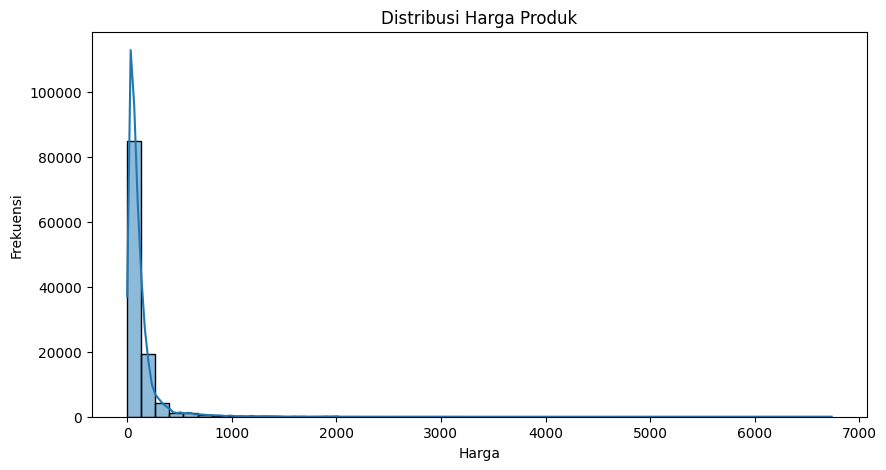

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(order_items_df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Sebagian besar produk memiliki harga rendah, terlihat dari distribusi yang sangat condong ke kiri dengan ekor panjang ke kanan. Ini menunjukkan bahwa mayoritas produk dijual dengan harga yang relatif murah, sementara hanya sedikit produk yang memiliki harga sangat tinggi.
- Jika strategi harga diterapkan, perusahaan dapat mempertimbangkan bundling atau diskon pada produk harga tinggi untuk meningkatkan penjualan mereka.

### EDA Bivariate

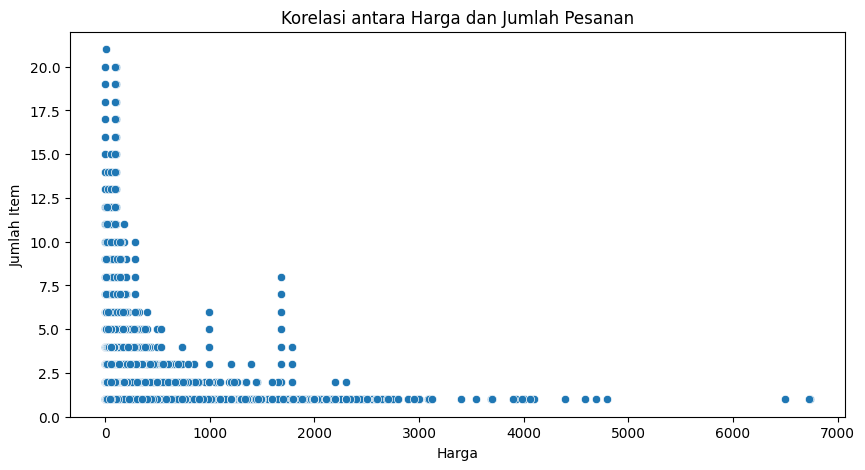

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=order_items_df['price'], y=order_items_df['order_item_id'])
plt.title('Korelasi antara Harga dan Jumlah Pesanan')
plt.xlabel('Harga')
plt.ylabel('Jumlah Item')
plt.show()

**Insight:**
- Dapat dilihat bahwa mayoritas titik data terkonsentrasi di bagian harga rendah (di bawah 1000), di mana jumlah item per pesanan bisa mencapai lebih dari 20. Sementara itu, produk dengan harga lebih tinggi cenderung memiliki jumlah item yang lebih sedikit dalam satu pesanan. Ini menunjukkan bahwa pelanggan lebih cenderung membeli dalam jumlah besar ketika harga produk lebih rendah, sedangkan produk dengan harga tinggi lebih jarang dibeli dalam jumlah banyak.

### EDA Multivariate

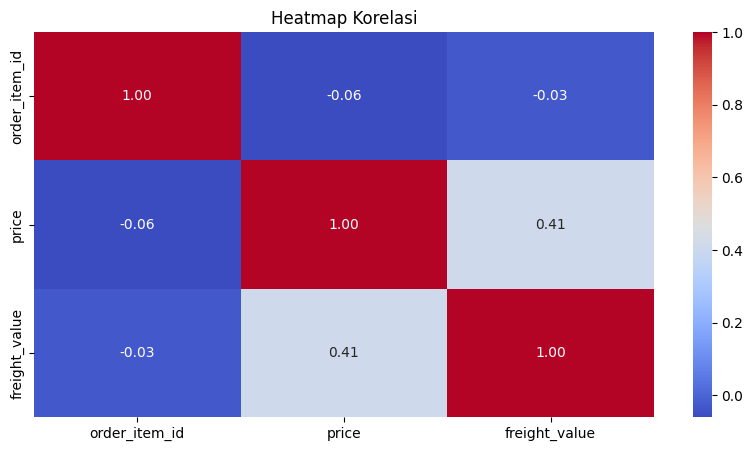

In [10]:
plt.figure(figsize=(10,5))
numeric_cols = order_items_df.select_dtypes(include=['number'])  # Pilih kolom numerik
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()


**Insight:**
- Terdapat korelasi positif sebesar 0.41 antara harga produk (price) dan biaya pengiriman (freight_value). Ini menunjukkan bahwa semakin mahal suatu produk, semakin tinggi kemungkinan biaya pengirimannya. Namun, korelasinya tidak terlalu kuat, sehingga faktor lain mungkin juga mempengaruhi biaya pengiriman.

### Agregasi

In [11]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders_df.groupby('order_month').size().reset_index(name='total_orders')
print(monthly_orders.head())

  order_month  total_orders
0     2016-09             1
1     2016-10           270
2     2016-12             1
3     2017-01           748
4     2017-02          1641


**Insight:**
- Dari data yang terlihat, ada pertumbuhan pesanan yang signifikan dalam beberapa bulan awal, terutama dari Desember 2016 ke Februari 2017. Hal ini bisa menandakan adanya faktor musiman, kampanye promosi, atau peningkatan adopsi platform e-commerce oleh pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dari waktu ke waktu?

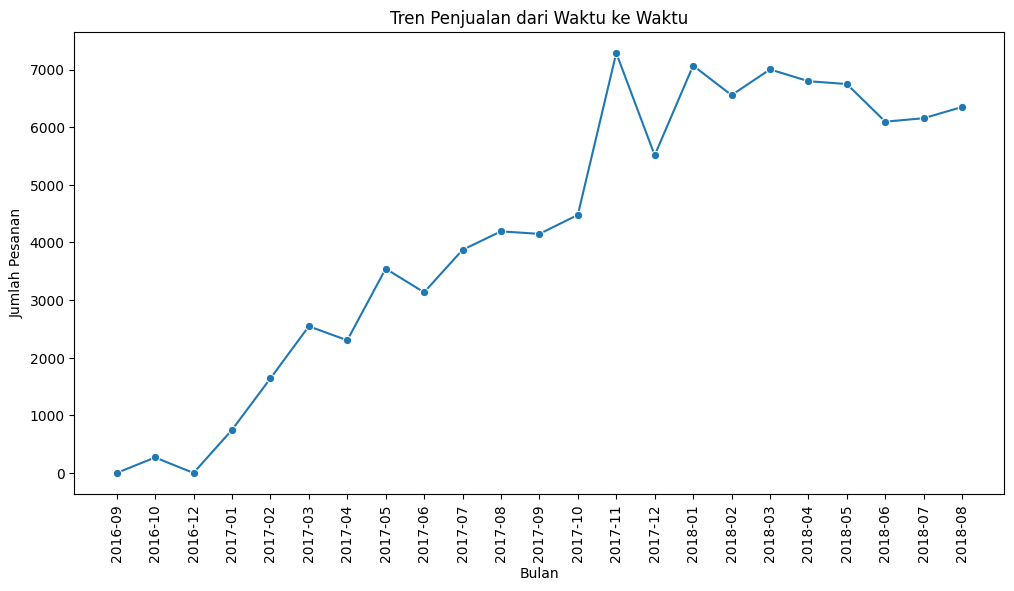

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker='o')
plt.xticks(rotation=90)
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

### Pertanyaan 2: Siapa pelanggan paling bernilai berdasarkan RFM Analysis?

<ipython-input-7-b06874bc8f00>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers['Monetary'], palette='viridis')


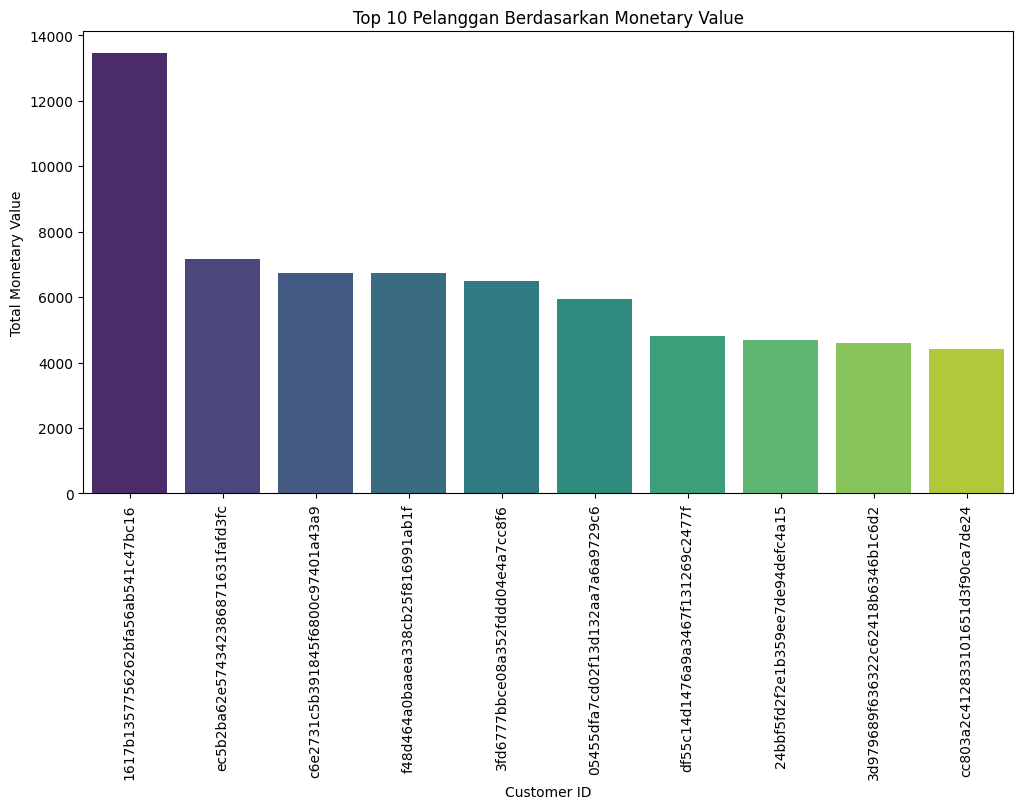

In [ ]:
import datetime
latest_date = orders_df['order_purchase_timestamp'].max()
rfm_df = orders_df.merge(order_items_df, on='order_id')
rfm_df = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df.sort_values(by='Monetary', ascending=False).head()

plt.figure(figsize=(12,6))
top_customers = rfm_df.sort_values(by='Monetary', ascending=False).head(10)
sns.barplot(x=top_customers.index, y=top_customers['Monetary'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Pelanggan Berdasarkan Monetary Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Monetary Value')
plt.show()

**Insight:**
- Tren penjualan menunjukkan peningkatan signifikan sejak awal hingga mencapai puncaknya pada akhir 2017. Namun, terdapat penurunan drastis setelah pertengahan 2018, yang mungkin disebabkan oleh faktor musiman atau perubahan strategi bisnis.
- Satu pelanggan memiliki nilai transaksi yang jauh lebih tinggi dibandingkan pelanggan lainnya, hampir dua kali lipat dari pelanggan di posisi kedua. Ini menunjukkan bahwa pelanggan ini berkontribusi secara signifikan terhadap pendapatan. Perusahaan dapat mempertimbangkan strategi khusus seperti program loyalitas, penawaran eksklusif, atau layanan premium untuk mempertahankan dan meningkatkan keterlibatan pelanggan bernilai tinggi ini.

## Analisis Lanjutan (Opsional)

### Teknik yang digunakan:

#### - RFM Analysis (Recency, Frequency, Monetary) untuk menilai pelanggan berdasarkan:
- Recency (R): Seberapa baru pelanggan terakhir melakukan pembelian.
- Frequency (F): Seberapa sering pelanggan melakukan pembelian.
- Monetary (M): Berapa total uang yang dihabiskan oleh pelanggan.

#### - Quantile Binning (Qcut) untuk membagi skor RFM menjadi 4 kelompok (1-4).

#### - Scoring & Segmentation menggunakan aturan yang memetakan skor RFM ke kategori pelanggan.

### Tujuan Analisis

- Mengkategorikan pelanggan menjadi beberapa segmen berdasarkan nilai transaksi mereka.
- Mengidentifikasi pelanggan bernilai tinggi (Best Customers) dan pelanggan yang membutuhkan perhatian (Low Value).
- Menyusun strategi pemasaran berbasis data untuk meningkatkan loyalitas pelanggan dan retensi.

In [ ]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4])

rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

seg_map = {
    r'[1-3]': 'Low Value',
    r'[4-6]': 'Mid Value',
    r'[7-9]': 'High Value',
    r'10|11|12': 'Best Customers'
}
rfm_df['Segment'] = rfm_df['RFM_Score'].astype(str).replace(seg_map, regex=True)

print(rfm_df['Segment'].value_counts())

Segment
High Value            49593
Mid Value             29372
Low Value0             9126
Low ValueLow Value     6735
Low Value              1635
Name: count, dtype: int64


<ipython-input-9-afafb399f20e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rfm_df['Segment'], palette='coolwarm', order=rfm_df['Segment'].value_counts().index)


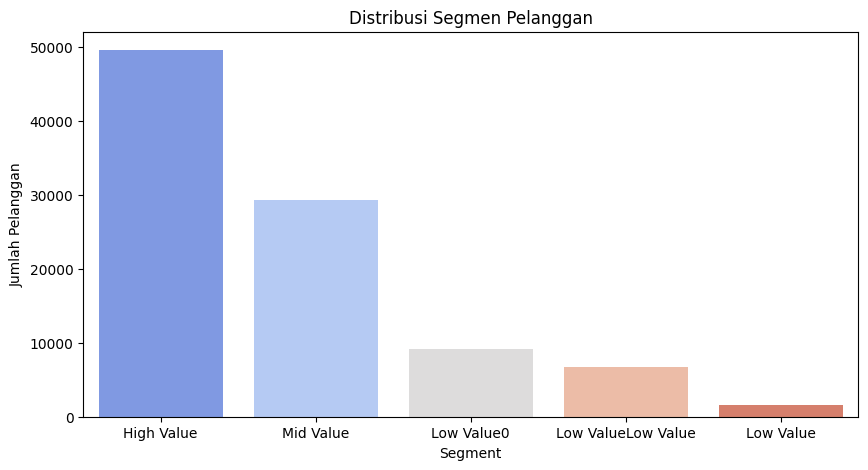

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=rfm_df['Segment'], palette='coolwarm', order=rfm_df['Segment'].value_counts().index)
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### **Insight:**
#### - Sebaran Pelanggan:
- High Value Customers merupakan segmen terbesar, menunjukkan bahwa banyak pelanggan yang cukup aktif dan memiliki kontribusi nilai transaksi yang besar.
- Mid Value Customers juga cukup signifikan jumlahnya, mencerminkan pelanggan dengan pola belanja menengah.
- Low Value Customers terdiri dari beberapa subkategori, termasuk pelanggan dengan frekuensi dan nilai transaksi yang rendah.

#### - Implikasi Bisnis:
- High Value Customers bisa menjadi target utama untuk strategi retensi pelanggan, seperti program loyalitas, diskon eksklusif, atau penawaran khusus untuk mempertahankan engagement mereka.
- Mid Value Customers berpotensi untuk ditingkatkan ke level High Value dengan pendekatan upselling atau cross-selling.
- Low Value Customers perlu dianalisis lebih lanjut untuk memahami alasan mereka memiliki tingkat transaksi yang rendah. Strategi seperti kampanye pemasaran ulang (retargeting) atau insentif khusus dapat dicoba untuk meningkatkan aktivitas belanja mereka.

## Conclusion

- Tren penjualan mengalami fluktuasi dari waktu ke waktu. Beberapa bulan menunjukkan lonjakan jumlah pesanan, yang mungkin disebabkan oleh faktor musiman atau promosi tertentu. Pemahaman pola ini dapat membantu dalam perencanaan strategi pemasaran yang lebih efektif.

- Satu pelanggan memiliki nilai transaksi yang jauh lebih tinggi dibandingkan pelanggan lainnya, menunjukkan bahwa kontribusinya terhadap pendapatan sangat signifikan. Pelanggan seperti ini layak mendapatkan perhatian khusus melalui program loyalitas atau layanan eksklusif untuk meningkatkan retensi.

- Mayoritas pelanggan berada dalam kategori High Value, menunjukkan bahwa banyak pelanggan melakukan pembelian berulang dengan nilai transaksi yang tinggi. Terdapat segmen Low Value, yang mungkin mencerminkan pelanggan dengan transaksi sekali pakai atau pola pembelian yang tidak konsisten. Analisis lebih lanjut diperlukan untuk memahami apakah segmen ini bisa dikembangkan atau ditargetkan dengan strategi pemasaran tertentu.
